In [1]:
# Importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Importing MNIST datset
dataset = keras.datasets.mnist.load_data() #returns (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = dataset

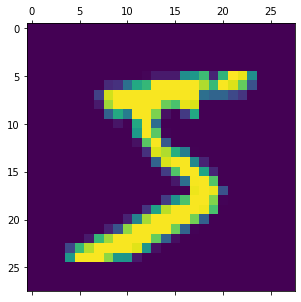

In [3]:
# Visualizing 1st row from training dataset
plt.matshow(x_train[0])
plt.show()

In [4]:
# Normalizing Datset 
x_train = x_train/255 # 255 indicates range of possible value of pixel
x_test = x_test/255

In [5]:
# Flattening train and test dataset to 2D array
x_train_flatten = x_train.reshape(len(x_train),28*28) # (60000, 28, 28) - > (60000, 784)
x_test_flatten = x_test.reshape(len(x_test),28*28) # (10000, 28, 28) -> (10000, 784)

In [6]:
def customGenerator(x_train, y_train, batch_size):
    """
    Custom data generator that yields batches of features and labels from the input data.

    Args:
    - x_train (numpy array): The input features.
    - y_train (numpy array): The corresponding labels.
    - batch_size (int): The batch size.

    Yields:
    - tuple: A tuple containing a batch of features and labels.
    """
    num_samples = len(x_train) # Total number of samples in the dataset
    while True:    
        for i in range(0, num_samples, batch_size): # Iterate over the dataset in batches
            # Yield a batch of features and labels
            yield x_train[i:i+batch_size], y_train[i:i+batch_size]

In [7]:
batch_size = 2
train_generator = customGenerator(x_train_flatten, y_train, batch_size)

In [8]:
# Dictionary to store metrics
metrics = {'loss': [],  'accuracy': []}

In [9]:
# Perceptron 
with tf.device('/GPU:0'): # To run model on GPU
    model = keras.Sequential([ #
        keras.layers.Dense(10, input_shape = (784, ), activation = "sigmoid") 
    ])

In [10]:
model.compile(
    optimizer = 'adam',  # Using the Adam optimizer
    loss = 'sparse_categorical_crossentropy',  # Using sparse categorical crossentropy loss
    metrics = ['accuracy'])  # Tracking accuracy as the metric

In [14]:
epoch = 25
for i in range(epoch):
    # Print current epoch number
    print("Epoch: {}/{}".format(i+1,epoch))
    
     # Train the model for one epoch using the training generator
    history = model.fit(train_generator,steps_per_epoch= len(x_train_flatten)//40)
    
     # Update metrics dictionary with loss and accuracy values for this epoch
    for metric in metrics.keys():
        metrics[metric].append(model.history.history[metric][0])

Epoch: 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2926 - accuracy: 0.9193
Epoch: 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2593 - accuracy: 0.9323
Epoch: 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3095 - accuracy: 0.9110
Epoch: 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2545 - accuracy: 0.9293
Epoch: 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3618 - accuracy: 0.9040
Epoch: 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2881 - accuracy: 0.9203
Epoch: 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2728 - accuracy: 0.9337
Epoch: 8/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2729 - accuracy: 0.9287
Epoch: 9/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2849 - accuracy: 0.9227
Epoch: 10/25
1500/1500 [==============================] - 6s 4ms/step - l

In [15]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test_flatten, y_test)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.9209
Test Loss: 0.28433310985565186
Test Accuracy: 0.9208999872207642


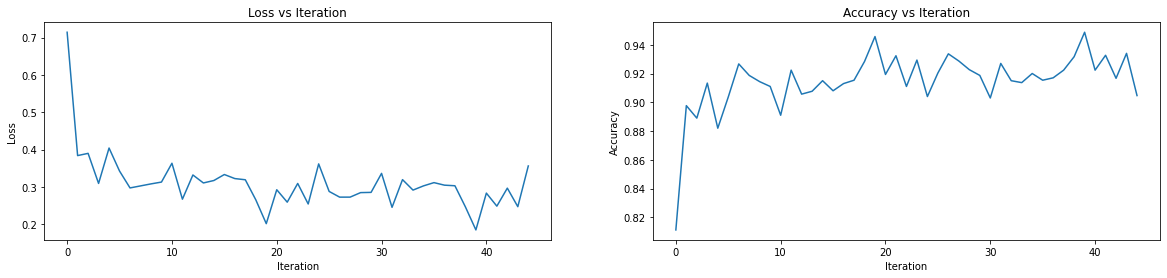

In [16]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)

# Plot loss vs iteration on the first subplot
ax1.plot(metrics['loss'])
ax1.title.set_text("Loss vs Iteration")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Iteration")


# Plot accuracy vs iteration on the second subplo
ax2.plot(metrics['accuracy'])
ax2.title.set_text("Accuracy vs Iteration")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Iteration")

# Display the plots
plt.show()